In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
# Load Cascade Classifier configuration files
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

In [3]:
def face_detect(imagefile):
    # Read face image and convert it to grayscale
    img = cv2.imread(imagefile)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect face using grayscale image
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    for (x, y, w, h) in faces: 
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)

        # Region of interface of the face
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Detect eyes
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 5)    
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0., 255, 0), 5)

    # Show the detection
    plt.imshow(img)

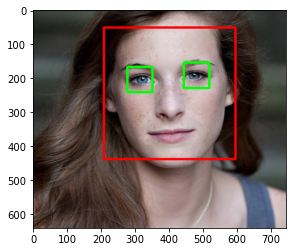

In [4]:
face_detect('./asset/girl1.png')

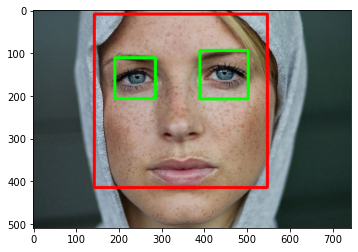

In [5]:
face_detect('./asset/girl2.png')